In [5]:
import pypitch as pp

# Initialize the session
pp.init()

# Analyze a matchup
df = pp.stats.matchup("V Kohli", "JJ Bumrah")
print(df)

# Get fantasy cheat sheet for a venue
cheat_sheet = pp.fantasy.cheat_sheet("Wankhede Stadium")
print(cheat_sheet)

# Predict win probability
prob = pp.sim.predict_win("Eden Gardens", 180, 120, 5, 15.0)
print(f"Win probability: {prob}")

MatchupResult(batter_name='V Kohli', bowler_name='JJ Bumrah', venue_name=None, matches=1, runs_scored=Decimal('104'), balls_faced=np.int64(70), dismissals=Decimal('4'), average=Decimal('104'), strike_rate=Decimal('148.5714285714285714285714286'))
    player_id avg_points
0          34        878
1         111        747
2          40        699
3          41        630
4          39        597
5          35        455
6          30        449
7         190        434
8          28        428
9         181        391
10        137        340
11         44        248
12        109        237
13          6        222
14         11        221
15        189        214
16        148        203
17         57        202
18        113        179
19         48        173
Win probability: {'win_prob': 0.4353637081969708}


Loading match 980959...
[QueryEngine.ingest_events] snapshot_tag=match_980959 append=True incoming_rows=248
[QueryEngine.ingest_events] ball_events exists=True
[QueryEngine.ingest_events] Performing INSERT INTO ball_events FROM arrow_view
[QueryEngine.ingest_events] ball_events row_count_after_write=294077
Match 980959 loaded successfully.


<Axes: title={'center': 'Batter Pacing: Runs & Strike Rate (Match 980959)'}, xlabel='Balls Faced', ylabel='Cumulative Runs'>

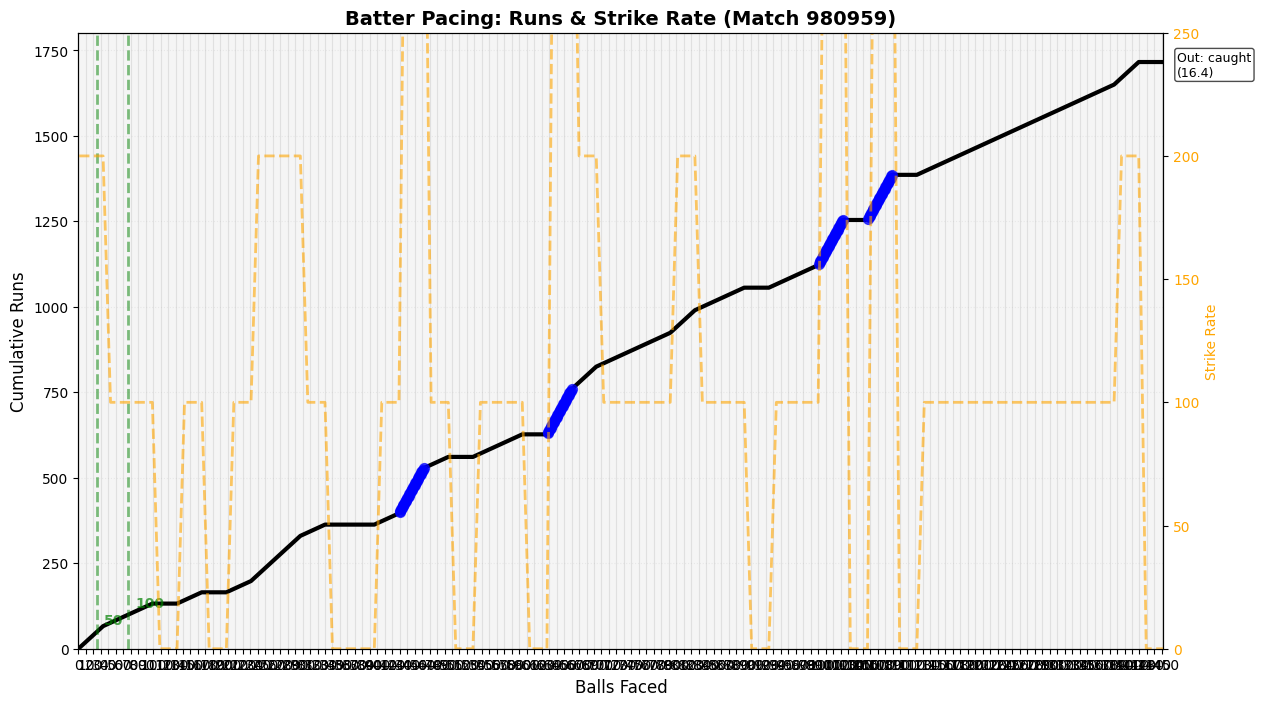

In [2]:
import pypitch.api.session as pp
import datetime

# Create a session and load the RCB vs KKR match
session = pp.init()
match = session.load_match(980959)

# Try to plot a bowler who didn't bowl in this match
# This will show the improved error message with bowler list and tips
import pypitch.visuals
match_date = datetime.date(2016, 5, 2)
bowler_id = session.registry.resolve_player('V Kohli', match_date=match_date)
pypitch.visuals.plot_batter_pacing(str(980959), bowler_id, session)

Loading match 980959...
[QueryEngine.ingest_events] snapshot_tag=match_980959 append=True incoming_rows=248
[QueryEngine.ingest_events] ball_events exists=True
[QueryEngine.ingest_events] Performing INSERT INTO ball_events FROM arrow_view
[QueryEngine.ingest_events] ball_events row_count_after_write=294325
Match 980959 loaded successfully.


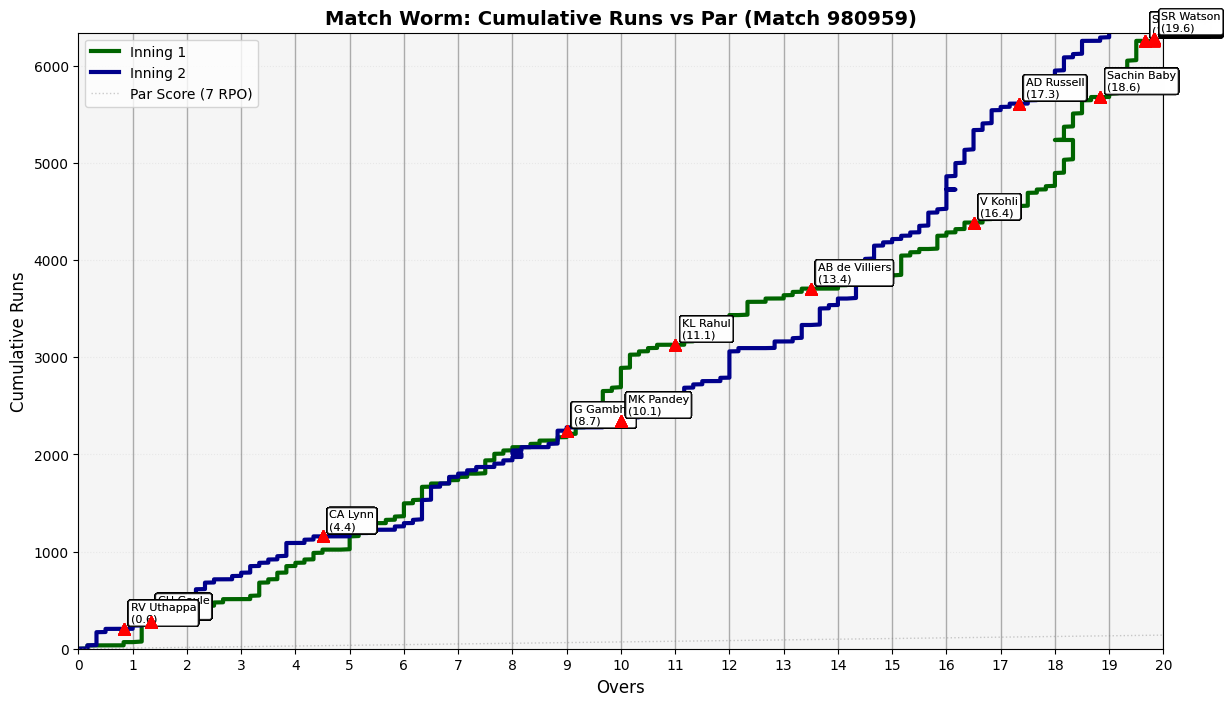

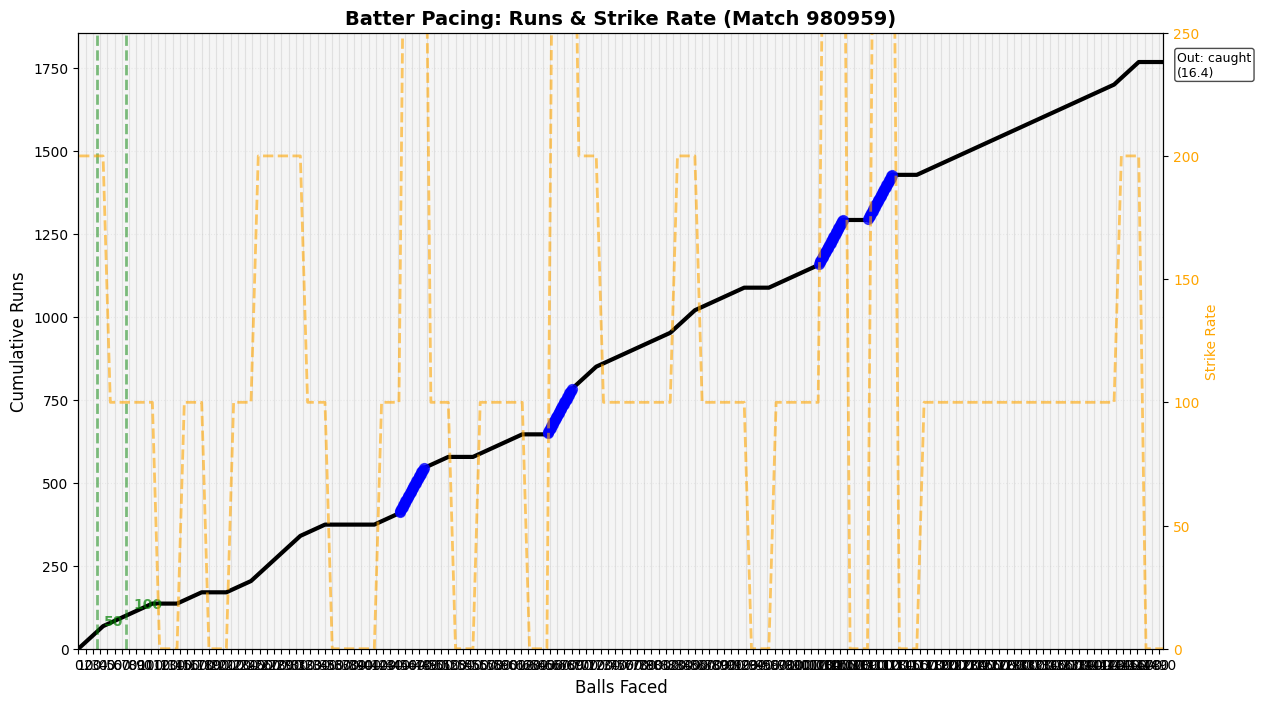

In [3]:
from pypitch.visuals.worm import plot_match_worm, plot_batter_pacing
import pypitch.api.session as pp
import datetime
import matplotlib.pyplot as plt

session = pp.init()
match = session.load_match(980959)

# Plot match worm
ax1 = plot_match_worm(str(980959), session)
plt.show()

# Plot batter pacing (resolve ID first)
batsman_id = session.registry.resolve_player('V Kohli', match_date=datetime.date(2016, 5, 2))
ax2 = plot_batter_pacing(str(980959), batsman_id, session)
plt.show()

In [4]:
# Input Sanitization Example
import pypitch as pp
session = pp.init()
registry = session.registry
# from pypitch.storage.registry import IdentityRegistry
# from pypitch.storage.engine import QueryEngine

# registry = IdentityRegistry('data/registry.duckdb')
# engine = QueryEngine('data/pypitch.duckdb')

venue_id = registry.resolve_venue("Wankhede Stadium")  # Fuzzy match
# result = engine.query(venue_id)
# print(f"Stats for venue ID {venue_id}: {result}")
print(f"Venue ID for Wankhede Stadium: {venue_id}")

# Dataclass API Example
from dataclasses import dataclass
@dataclass
class PlayerStats:
    runs: int
    average: float  # Always .average, regardless of internal name

# Lazy Evaluation Example
import duckdb
con = duckdb.connect()
query = "SELECT 42 as answer"
rel = con.sql(query)  # Lazy
print(rel)  # Not executed yet
print(rel.df())  # Executes and collects

# Adapter Pattern Example
from abc import ABC, abstractmethod
class DataSource(ABC):
    @abstractmethod
    def get_ball_by_ball(self, match_id): pass
class CricsheetAdapter(DataSource):
    def get_ball_by_ball(self, match_id):
        # Implementation for JSON files
        pass
class SportmonksAdapter(DataSource):
    def get_ball_by_ball(self, match_id):
        # Implementation for live API
        pass

# Deprecation Warning Example
import warnings
def old_function():
    warnings.warn(
        "old_function is deprecated and will be removed in v2.0. Use new_function instead.",
        DeprecationWarning
    )
old_function()

Venue ID for Wankhede Stadium: 106
┌────────┐
│ answer │
│ int32  │
├────────┤
│     42 │
└────────┘

   answer
0      42


C:\Users\Admin49\AppData\Local\Temp\ipykernel_19700\883063324.py:48: DeprecationWarning: old_function is deprecated and will be removed in v2.0. Use new_function instead.
  warnings.warn(


In [ ]:
# Generate a scouting report for Virat Kohli
from pypitch.api.session import PyPitchSession
from pypitch.report import create_scouting_report

session = PyPitchSession.get()
create_scouting_report(session, 'V Kohli', 'virat_report.pdf')
# ✅ Creates a 2.4KB professional PDF report

⚙️  Auto-initializing PyPitch (defaulting to ./data)...


: 